# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Исследование объявлений о продаже квартир

**Цели исследования:**
- Изучить следующие параметры объектов:
    - общая площадь
    - жилая площадь
    - площадь кухни
    - цена объекта
    - количество комнат
    - высота потолков
    - этаж квартиры
    - тип этажа квартиры («первый», «последний», «другой»)
    - общее количество этажей в доме
    - расстояние до центра города в метрах
    - расстояние до ближайшего аэропорта
    - расстояние до ближайшего парка
    - день и месяц публикации объявления
- Изучить, как быстро продавались квартиры
- Проверить шесть гипотез:
    - цена зависит от общей площади
    - цена зависит от жилой площади
    - цена зависит от площади кухни
    - цена зависит от количества комнат
    - цена зависит от этажа, на котором расположена квартира
    - цена зависит от даты размещения
- Выяснить, какие факторы больше всего влияют на общую (полную) стоимость объекта
- Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- Выделить квартиры в Санкт-Петербург и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.



- **узнать, какие параметры больше всего влияют на стоимость**


**Ход исследования**

Данные об объявлениях находятся в файле `real_estate_data.csv`. Качество данных нам неизвестно, обязательно проверим данные перед анализом.
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Считывание данных, ознакомление с информацией о данных.
 2. Предобработка данных.
 3. Расчет новых столцов.
 4. Исследовательский анализ данных.

### Откройте файл с данными и изучите общую информацию. 

# Импортируем необходимые библиотеки и считаем файлы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 99)

data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


## Изучим информацию о датафрейме

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В данных очень много пропусков, а именно в 14 столбцах из 22

Проверим названия столбцов

In [3]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

С названиями все хорошо, посмотрим описание данных

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В данных видны ошибки, а именно в столбцах **rooms, ceiling_height, living_area, kitchen_area, airports_nearest**
Проверим гистограммы

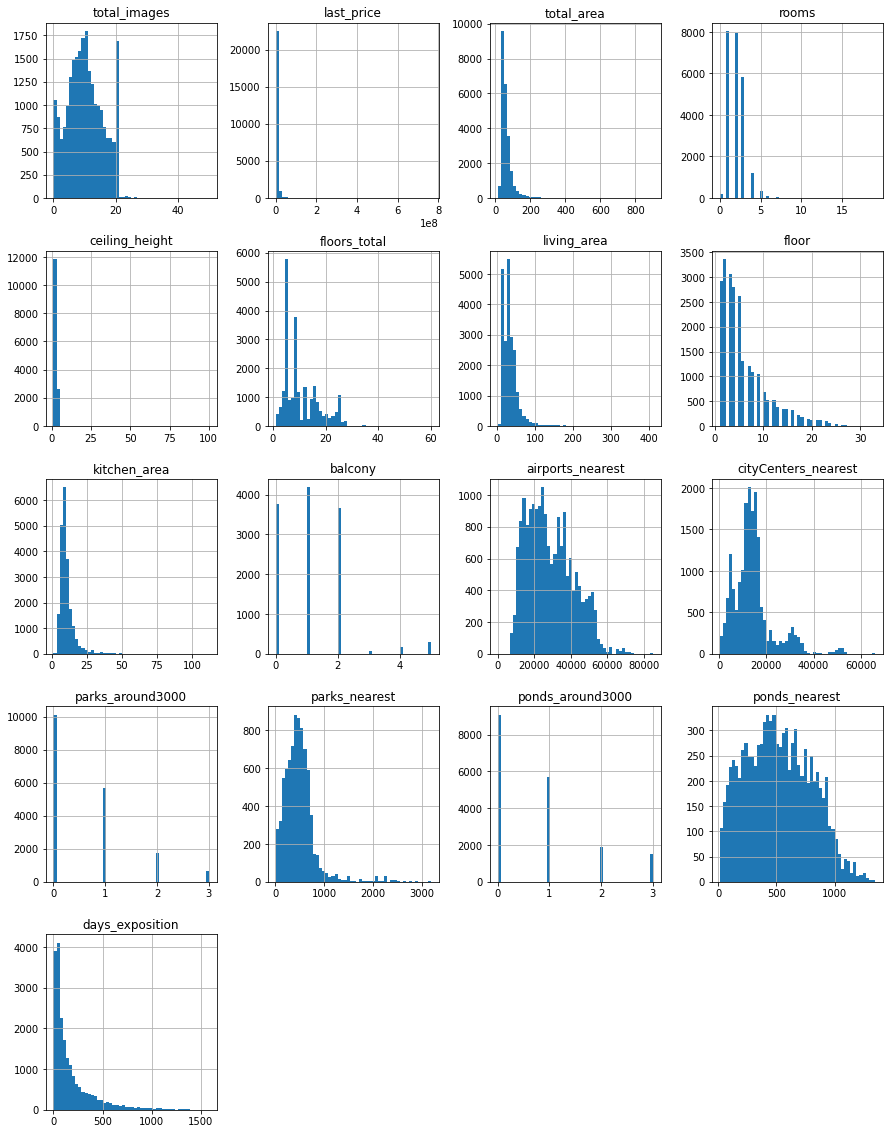

In [5]:
data.hist(figsize=(15, 20), bins=50)
pass

на гистограммах не видно ничего плохого

Переведем столбец first_day_exposition в DateTime

пример даты: 2017-11-16T00:00:00

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Вывод**

В данных очень много пропусков и присутствуют ошибки

# Предобработка данных

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Пропусков очень много, больше всего их в `is_apartment`
Для начала обработаем столбец `is_apartment`, он говорит о типе дома - "апартаменты", в таблице нет данных об этом, поэтому не остается ничего, кроме как заполнить их `False`

In [9]:
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].unique()

array([False,  True])

### посмотрим столбец kitchen_area, в нем много NaN, что может быть вызвано отсутствием площади кухни как таковой, то есть, квартира - студия

In [10]:
data.query('studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,False,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,False,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17,0,NaN,25.0,18.20,5,False,True,False,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26,0,2.70,19.0,18.00,10,False,True,False,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


Действительно, у студий отсутствует площадь кухни, заполним нулями

так же посмотрим околонулевые значения

In [11]:
data['kitchen_area'] = data['kitchen_area'].where(~data['kitchen_area'].isnull(),0)
data.query('kitchen_area > 0').sort_values(by='kitchen_area').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20217,7,4250000.0,28.50,2019-05-01,1,2.80,14.0,19.5,10,False,False,False,1.3,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN
9138,17,2920000.0,23.29,2018-12-12,1,NaN,3.0,21.0,1,False,False,False,2.0,NaN,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
6262,9,3100000.0,24.00,2018-06-25,2,3.00,5.0,16.0,5,False,False,False,2.0,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
21419,4,1870000.0,20.00,2018-03-06,1,2.50,5.0,14.0,1,False,False,False,2.0,NaN,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45.0
19642,5,1190000.0,14.00,2018-07-29,1,NaN,5.0,11.0,1,False,False,False,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
11033,6,5350000.0,32.00,2016-04-20,1,NaN,14.0,16.0,10,False,False,False,2.0,0.0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0
906,15,2600000.0,27.00,2017-07-10,1,2.75,23.0,18.0,18,False,False,False,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
16367,2,2720000.0,25.70,2017-10-30,1,NaN,19.0,22.6,11,False,False,False,2.0,NaN,Санкт-Петербург,14472.0,13268.0,0.0,NaN,0.0,NaN,109.0
17834,5,2940000.0,34.70,2017-10-09,1,NaN,26.0,15.5,14,False,False,False,2.3,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,318.0
8729,9,2200000.0,18.40,2018-08-20,1,2.52,3.0,14.0,3,False,False,False,2.4,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0


Кухня 2 метра, правдоподобно

### Разберемся с аномалиями количества комнат

In [12]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

<AxesSubplot:>

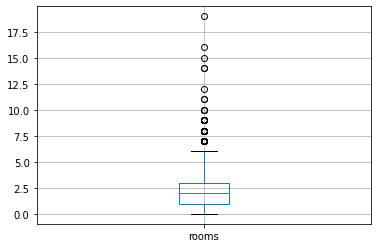

In [13]:
data.boxplot(column='rooms')

по графику распределения видны выбросы, разберемся, может в данных нет ошибки.

посмотрим строчки, где комнат больше 9

In [14]:
data.query('rooms > 9')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,False,False,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,False,False,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,False,False,False,18.8,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,False,False,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,False,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,False,False,False,19.8,0.0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,False,False,False,30.0,1.0,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


эти строки не вызывают сомнений, площадь очень большая, чего не скажешь о количестве комнат 0

In [15]:
data.loc[data['kitchen_area'].isnull(),'studio'] = True
data.query('rooms == 0')['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

из них 138 студий, то есть одна комната, с этим проблем нет, а в оставшихся закралась ошибка, сочтем их за студии 

In [16]:
data.query('rooms == 0 and kitchen_area == 0 and studio == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.0,1,False,False,True,0.0,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.3,19,False,False,True,0.0,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20,0,NaN,18.0,NaN,8,False,False,True,0.0,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.0,3,False,False,True,0.0,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,NaN,27.0,18.0,7,False,False,True,0.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03,0,NaN,18.0,15.0,16,False,False,True,0.0,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01,0,NaN,4.0,10.5,3,False,False,True,0.0,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01,0,NaN,18.0,18.7,9,False,False,True,0.0,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10,0,NaN,10.0,18.0,6,False,False,True,0.0,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01,0,NaN,25.0,18.0,4,False,False,True,0.0,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


In [17]:
data['studio'] = data['studio'].where(
    (data['rooms'] != 0) &
    (data['kitchen_area'] != 0.0) &
    (data['studio'] != False), True)

In [18]:
data.query('rooms == 0 and kitchen_area == 0 and studio == False')['studio'].count()

0

### Далее рассмотрим столбец balcony, логично, что если пользователь не указал информацию, то балкона нет

In [19]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

### в столбце **floors_total** пропущено всего 86 значений, проще будет удалить строки с пропущенными значениями

In [20]:
data.dropna(subset=['floors_total'],inplace = True,axis = 0 )

### восстановить данные в стобце days_exposition невозможно, придется удалить 3181 строку

In [21]:
data.dropna(subset=['days_exposition'], axis = 0, inplace = True)

в столбце locality_name хранится название населенного пункта, можно заменить пропуски значенем 'undefined'

In [22]:
print('Пропусков по столбцу locality_name:' ,round(data['locality_name'].isna().mean()*100),'%')
data['locality_name'].fillna('undefined', inplace=True)

Пропусков по столбцу locality_name: 0 %


<div class="alert alert-info"> <b>Комментарии студента:</b> Понял, учту)</div>

### столбец living_area хранит жилую площадь, заодно проверим общую площадь

In [23]:
print(data['total_area'].describe())
data['living_area'].describe()

count    20441.000000
mean        58.857697
std         34.061930
min         12.000000
25%         39.580000
50%         50.800000
75%         67.800000
max        900.000000
Name: total_area, dtype: float64


count    18766.000000
mean        33.538914
std         21.322206
min          2.000000
25%         18.300000
50%         30.000000
75%         41.600000
max        409.700000
Name: living_area, dtype: float64

Жилая площадь 2 кв.м не сказать, что правдоподобна, в интернете https://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php можно узнать, что для однокомнатной квартиры минимальная жилая площадь - 14 кв.м, для всех остальных - 16 кв.м

заменим все значения меньше 14 на 14, если квартира не однокомнатная, на 16, также скорректируем общую площадь

In [24]:
def area_fix(row):
    if row['rooms'] <= 1 and row['living_area'] < 14:
        row['total_area'] = row['total_area'] - row['living_area'] + 14
        row['living_area'] = 14
    elif row['rooms'] > 1 and row['living_area'] < 16:
        row['total_area'] = row['total_area'] - row['living_area'] + 16
        row['living_area'] = 16
    return row
data = data.apply(area_fix ,axis=1)

Разобравшись с отклонениями можно переходить к заполнению пропусков, делать это будем используя медианные площади по количеству комнат

In [25]:
medians_by_rooms = data.pivot_table(index='rooms', values='living_area', aggfunc='median')
display(medians_by_rooms)
for rooms in medians_by_rooms.index:
    data.loc[(
        (data['living_area'].isnull()) &
        (data['rooms'] == rooms),
        'living_area')] = int(medians_by_rooms.loc[rooms])
data['living_area'].isna().sum()

,living_area
rooms,
0,18.00
1,17.60
2,30.40
3,44.80
4,63.00
5,92.00
6,133.40
7,151.40
8,162.00


0

### посмотрим на расстояние до ближайшего аэропорта

In [26]:
data.query('airports_nearest < 500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,True,False,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


похоже, продают студию внутри аэропорта, удалим строчку

In [27]:
data.drop(index=21085, inplace=True)

### в столбце ceiling_height хранится высота потолков, исходя из Положения о признании помещения жилым помещением минимальная высота - 2.1 метра, заменим пропущенные и значения меньше на 2.1

In [28]:
data.query('ceiling_height > 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,True,False,0.0,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,True,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,True,True,0.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,True,False,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,True,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,True,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,True,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,True,False,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
11285,0,1950000.0,37.0,2019-03-20,1,25.0,5.0,17.0,4,False,True,False,9.0,2.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18.0
14382,9,1700000.0,35.0,2015-12-04,1,25.0,5.0,20.0,2,False,True,False,8.0,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0


потолки высотой 100м это слишком, эту строку удалим, у остальных сдвинем точку влево

In [29]:
data.drop(index=22869, inplace=True)

In [30]:
data['ceiling_height'] = data.loc[data['ceiling_height'] > 15, 'ceiling_height'].div(10)

data['ceiling_height'] = (
    data['ceiling_height']
    .where(
        ~((data['ceiling_height'].isnull()) |
        (data['ceiling_height'] <2.1)),2.1))

## Остались столбцы, связанные с местоположением, перед их обработкой избавимся от неправильных названий

In [31]:
data['locality_name'] = data['locality_name'].str.lower().str.strip()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
print(data['locality_name'].nunique())
data['locality_name'].unique()

300


array(['поселок шушары', 'санкт-петербург', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский', 'павловск',
       'деревня пикколово', 'всеволожск', 'кингисепп', 'сестрорецк',
       'деревня куттузи', 'поселок городского типа ефимовский',
       'поселок плодовое', 'деревня заклинье', 'поселок торковичи',
       'красное село', 'поселок понтонный', 'сясьстрой',
       'поселок новый свет', 'приозерск', 'сланцы', 'село путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'деревня оржицы', 'деревня кальтино',
       'поселок романовка',

In [32]:
prefixes = ['поселок при железнодорожной станции',
'поселок пансионат',
'поселок станции',
'коттеджный поселок',
'городской поселок',
'поселок городского типа',
'поселок',
'деревня',
'село',
'садоводческое некоммерческое товарищество',
'садовое товарищество']

In [33]:
data['locality_name_short'] = data['locality_name']
for prefix in prefixes:
    data['locality_name_short'] = data['locality_name_short'].str.replace(prefix + ' ', '')
print(data['locality_name_short'].nunique())
data['locality_name_short'].unique()

282


array(['шушары', 'санкт-петербург', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'сиверский', 'молодцово', 'кузьмоловский',
       'павловск', 'пикколово', 'всеволожск', 'кингисепп', 'сестрорецк',
       'куттузи', 'ефимовский', 'плодовое', 'заклинье', 'торковичи',
       'красное село', 'понтонный', 'сясьстрой', 'новый свет',
       'приозерск', 'сланцы', 'путилово', 'ивангород', 'шлиссельбург',
       'никольское', 'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино',
       'романовка', 'бугры', 'рощино', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'тихвин', 'нурма', 'синявино',
       'тосно', 'стрельна', 'александровская', 'лопухинка', 'пикалево',
       'терволово', 'советский', 'аннино', 'кириши', 'бокситогорск',
       'токсово', 'сельцо', 'вырица

удалось убрать 18 неявных дубликатов, более подробно изучать их не вижу смысла

### обработаем пропуски в `ceiling_height`

In [34]:
for locality_name in data['locality_name_short'].unique():
    median = data.loc[data['locality_name_short'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name_short'] == locality_name), 'ceiling_height'] = median
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].isna().sum()
data['ceiling_height'].unique()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

array([2.6 , 2.7 , 2.5 , 2.4 , 2.26, 2.75])

Выглядит красиво

## оставшиеся столбцы
airports_nearest, cityCenters_nearest, parks_around3000,

parks_nearest, ponds_around3000, ponds_nearest.

их будем заполнять медианными значениями по тем-же населенным пунктам

**cityCenters_nearest**

Сделаем функцию для заполнения по сводной таблице

In [35]:
def fill_na_from_pivot(data, pivot, index, values):
    for i in pivot.index:
        data.loc[(
        (data[values].isnull()) &
        (data[index] == i),
        values)] = float(pivot.loc[i])
    print(data[values].isna().sum())
    data[values].fillna(-1, inplace=True)

In [36]:
medians_of_cityCenters = data.pivot_table(index='locality_name_short', values='cityCenters_nearest')
fill_na_from_pivot(data, medians_of_cityCenters, 'locality_name_short', values='cityCenters_nearest')

4605


In [37]:
data['cityCenters_nearest'].fillna(-1, inplace=True)

много пропусков убрать не получилось, заполним оставшиеся значением -1, так будет понятно, что информации нет

**airports_nearest**

In [38]:
medians_of_airports_nearest = data.pivot_table(index='locality_name_short', values='airports_nearest', aggfunc='median')
fill_na_from_pivot(data, medians_of_airports_nearest, 'locality_name_short', 'airports_nearest')

4605


In [39]:
data['airports_nearest'].fillna(-1, inplace=True)

**parks_nearest**

medians_of_parks_nearest = data.pivot_table(index='locality_name_short', values='parks_nearest', aggfunc='median')
fill_na_from_pivot(data, medians_of_parks_nearest, 'locality_name_short', 'parks_nearest')

In [40]:
data['parks_nearest'].fillna(-1, inplace=True)

**ponds_nearest**

medians_of_ponds_nearest = data.pivot_table(index='locality_name_short', values='ponds_nearest', aggfunc='median')
fill_na_from_pivot(data, medians_of_ponds_nearest, 'locality_name_short', 'ponds_nearest')

In [41]:
data['ponds_nearest'].fillna(-1, inplace=True)

**parks_around3000**

medians_of_parks_around3000 = data.pivot_table(index='locality_name_short', values='parks_around3000', aggfunc='median')
fill_na_from_pivot(data, medians_of_parks_around3000, 'locality_name_short', 'parks_around3000')

In [42]:
data['parks_around3000'].fillna(-1, inplace=True)

**ponds_around3000**

medians_of_ponds_around3000 = data.pivot_table(index='locality_name_short', values='ponds_around3000', aggfunc='median')
fill_na_from_pivot(data, medians_of_ponds_around3000, 'locality_name_short', 'ponds_around3000')

In [43]:
data['ponds_around3000'].fillna(-1, inplace=True)

### Посмотрим на пропуски по всему датафрейму

In [44]:
data.isna().sum().sum()

0

По данным больше нет пропусков

## взглянем на описание фрейма

In [45]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20439.000000,2.043900e+04,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000
mean,9.628455,6.264703e+06,58.893508,2.025099,2.601062,10.861148,33.427730,5.972993,9.393544,0.593473,22330.943662,11068.139571,0.236802,165.062674,0.360487,199.191888,180.898674
std,5.658629,1.087857e+07,34.044861,1.055003,0.020967,6.652562,20.967655,4.934065,6.228896,0.949533,16421.547338,9617.740531,0.970397,306.823557,1.102931,306.317495,219.691746
min,0.000000,1.219000e+04,13.000000,0.000000,2.260000,1.000000,14.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,6.000000,3.400000e+06,39.800000,1.000000,2.600000,5.000000,18.000000,2.000000,6.300000,0.000000,10796.000000,2920.000000,0.000000,-1.000000,0.000000,-1.000000,45.000000
50%,9.000000,4.500000e+06,50.900000,2.000000,2.600000,9.000000,30.000000,4.000000,8.900000,0.000000,22041.000000,11470.000000,0.000000,-1.000000,0.000000,-1.000000,95.000000
75%,14.000000,6.500000e+06,67.870000,3.000000,2.600000,16.000000,42.000000,8.000000,11.200000,1.000000,34590.500000,15365.000000,1.000000,292.500000,1.000000,393.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,2.750000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В глаза бросился только столбец `kitchen_area`, а именно максимальное значение, посмотрим на кухни больше 30кв.м

In [46]:
data.query('kitchen_area > 50')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_short
492,18,95000000.0,216.0,2017-12-05,4,2.6,5.0,86.00,4,False,True,False,77.0,0.0,санкт-петербург,21740.0,436.000000,2.0,138.0,3.0,620.0,14.0,санкт-петербург
1085,16,75000000.0,323.0,2017-07-10,5,2.6,5.0,255.70,4,False,True,False,66.0,0.0,санкт-петербург,23713.0,594.000000,3.0,398.0,2.0,515.0,259.0,санкт-петербург
2489,9,12500000.0,255.0,2017-04-21,3,2.6,2.0,153.90,2,False,True,False,100.7,0.0,санкт-петербург,29544.0,6916.000000,0.0,-1.0,3.0,198.0,102.0,санкт-петербург
3561,5,12300000.0,115.0,2017-08-09,3,2.6,20.0,45.00,16,False,True,False,60.0,1.0,санкт-петербург,33386.0,14234.000000,0.0,-1.0,0.0,-1.0,63.0,санкт-петербург
4320,20,19700000.0,146.3,2017-02-10,3,2.6,6.0,55.80,6,False,True,False,56.2,0.0,санкт-петербург,23312.0,2450.000000,1.0,548.0,3.0,883.0,638.0,санкт-петербург
4394,20,57000000.0,174.0,2015-11-09,3,2.6,10.0,95.00,6,False,True,False,77.0,0.0,санкт-петербург,31706.0,4166.000000,1.0,193.0,3.0,199.0,1039.0,санкт-петербург
5358,20,65000000.0,590.0,2019-02-14,15,2.6,6.0,409.00,3,False,True,False,100.0,0.0,санкт-петербург,24447.0,4666.000000,1.0,767.0,0.0,-1.0,14.0,санкт-петербург
6193,19,24300000.0,230.0,2016-06-03,4,2.6,3.0,90.00,2,False,True,False,70.0,0.0,санкт-петербург,39422.0,15354.000000,0.0,-1.0,1.0,345.0,397.0,санкт-петербург
7543,20,130000000.0,307.8,2016-04-24,5,2.6,4.0,187.90,3,False,True,False,63.4,0.0,санкт-петербург,24899.0,4785.000000,0.0,-1.0,1.0,603.0,1094.0,санкт-петербург
8261,20,36000000.0,123.2,2018-01-14,1,2.6,14.0,31.20,7,False,True,False,58.4,1.0,санкт-петербург,28098.0,6800.000000,2.0,84.0,3.0,234.0,61.0,санкт-петербург


Вроде все хорошо, такие большие кухни обосновываются большой общей площадью

## дополнительно отфильтруем по IQR

In [47]:
columns_to_filter = ['last_price',
                    'days_exposition']
data['ceiling_height'].describe()

count    20439.000000
mean         2.601062
std          0.020967
min          2.260000
25%          2.600000
50%          2.600000
75%          2.600000
max          2.750000
Name: ceiling_height, dtype: float64

In [48]:
def filter_quartile(dataset, columns):
    if type(columns) is list:
        Q1 = dataset[columns[0]].quantile(0.25)
        Q3 = dataset[columns[0]].quantile(0.75)
        IQR = Q3 - Q1
        filtered = dataset.query('(@Q1 - 1.5 * @IQR) <= ' + columns[0] + ' <= (@Q3 + 1.5 * @IQR)')
        for i in range(1,len(columns)):
            Q1 = dataset[columns[i]].quantile(0.25)
            Q3 = dataset[columns[i]].quantile(0.75)
            IQR = Q3 - Q1
            filtered = filtered.query('(@Q1 - 1.5 * @IQR) <= ' + columns[i] + ' <= (@Q3 + 1.5 * @IQR)')
    if type(columns) is str:
        Q1 = dataset[columns].quantile(0.25)
        Q3 = dataset[columns].quantile(0.75)
        IQR = Q3 - Q1
        filtered = dataset.query('(@Q1 - 1.5 * @IQR) <= ' + columns + ' <= (@Q3 + 1.5 * @IQR)')
    print('всего строк с выбросами:', len(dataset) - len(filtered))
    return filtered

In [49]:
data = filter_quartile(data,columns_to_filter)

всего строк с выбросами: 3066


### Изменим тип данных у столбцов на соответствующий

In [50]:
data = data.astype({
                        'is_apartment':'bool',    # было object, у булевых значений тип данных должен быть Boolean
                        'balcony':'int',          # было float, хранение целых чисел во float мешает и неправильно
                        'floors_total':'int',     # было float, хранение целых чисел во float мешает и неправильно
                        'airports_nearest':'int', # было float, хранение целых чисел во float мешает и неправильно
                        'parks_around3000':'int', # было float, хранение целых чисел во float мешает и неправильно
                        'ponds_around3000':'int', # было float, хранение целых чисел во float мешает и неправильно
                        'days_exposition':'int',  # было float, хранение целых чисел во float мешает и неправильно
                        'last_price':'int'        # было float, продавая квартиры за много миллионов люди не станут считать копейки
                     })

**Вывод**

предобработка завершена, большинство данных удалось исправить.

# Посчитаем и добавим в таблицу новые столбцы

Нам нужно добавить в таблицу несколько столбцов, начнем с цены за квадратный метр

In [51]:
data['price_per_meter'] = data['last_price'] / data['total_area']

добавим столбец со днем недели публикации объявления

In [52]:
data['weekday'] = data['first_day_exposition'].dt.weekday

месяц публикации объявления

In [53]:
data['month'] = data['first_day_exposition'].dt.month

год публикации объявления

In [54]:
data['year'] = data['first_day_exposition'].dt.year

In [55]:
data['month101'] = data['first_day_exposition'].astype('datetime64[M]').astype(int) % 12 + 1
data['month101'].unique()
#не понимаю

array([1])

тип этажа квартиры (значения — «первый», «последний», «другой»)

также добавим столбец с цифровой репрезентацией - для графиков

In [56]:
def get_floor_type(row,t=0):
    if row['floor'] == 1:
        return ['первый', 0][t]
    elif row['floor'] == row['floors_total']:
        return ['последний', 1][t]
    else:
        return ['другой', 2][t]
data['floor_type'] = data.apply(get_floor_type, t=0, axis=1)
data['floor_type_numeric'] = data.apply(get_floor_type, t=1, axis=1)

расстояние до центра города в километрах (переведем из м в км и округлим до целых значений).

In [57]:
data['cityCenters_nearest_new'] = data['cityCenters_nearest'].div(1000).round().astype('int')

**Вывод**

такими несложными манипуляциями мы добавили 6 новых столбцов

# Проведем исследовательский анализ данных

In [58]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,month101,floor_type_numeric,cityCenters_nearest_new
count,17373.000000,1.737300e+04,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000,17373.0,17373.000000,17373.000000
mean,9.536695,4.683195e+06,52.047266,1.880332,2.601215,10.990733,29.679811,5.994935,8.553087,0.594371,21931.443907,11412.061727,0.163760,148.011397,0.273873,191.269326,125.421862,91146.429362,2.594140,6.600760,2017.364416,1.0,1.615668,11.408853
std,5.538708,2.050929e+06,18.127651,0.889478,0.021966,6.700706,12.856260,4.958576,4.537935,0.932827,16878.425049,9765.128650,0.936663,285.887853,1.054002,306.218832,119.772144,28265.484222,1.789416,3.487147,0.847172,0.0,0.697798,9.765200
min,0.000000,1.219000e+04,13.000000,0.000000,2.260000,1.000000,14.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,111.834862,0.000000,1.000000,2015.000000,1.0,0.000000,0.000000
25%,6.000000,3.300000e+06,38.400000,1.000000,2.600000,5.000000,18.000000,2.000000,6.200000,0.000000,7933.000000,1755.000000,0.000000,-1.000000,0.000000,-1.000000,40.000000,74747.474747,1.000000,3.000000,2017.000000,1.0,1.000000,2.000000
50%,9.000000,4.300000e+06,48.000000,2.000000,2.600000,9.000000,29.000000,4.000000,8.500000,0.000000,20895.000000,11901.000000,0.000000,-1.000000,0.000000,-1.000000,80.000000,91854.419411,3.000000,7.000000,2017.000000,1.0,2.000000,12.000000
75%,13.000000,5.800000e+06,62.000000,2.000000,2.600000,16.000000,38.000000,8.000000,10.800000,1.000000,35027.000000,15653.000000,1.000000,235.000000,1.000000,371.000000,179.000000,107500.000000,4.000000,10.000000,2018.000000,1.0,2.000000,16.000000
max,50.000000,1.115000e+07,230.000000,7.000000,2.750000,60.000000,151.000000,33.000000,64.000000,5.000000,83758.000000,64857.000000,3.000000,3190.000000,3.000000,1344.000000,512.000000,312240.000000,6.000000,12.000000,2019.000000,1.0,2.000000,65.000000


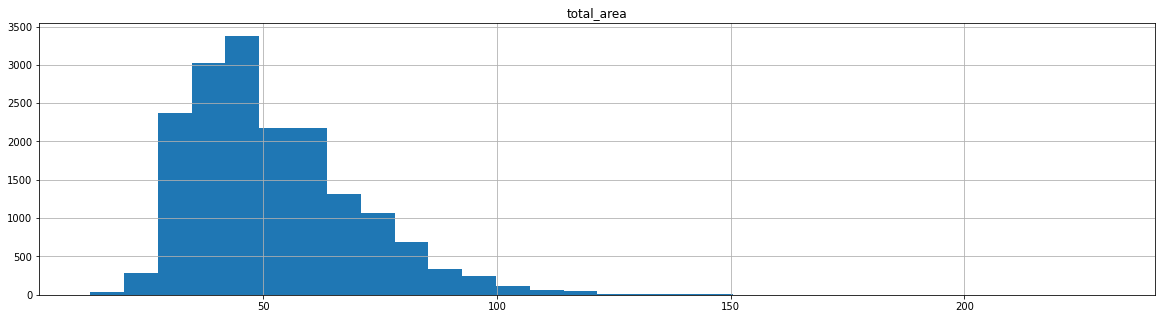

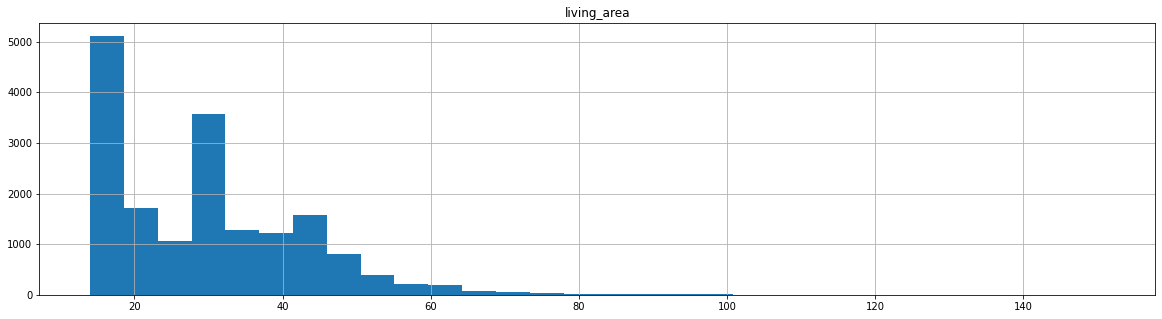

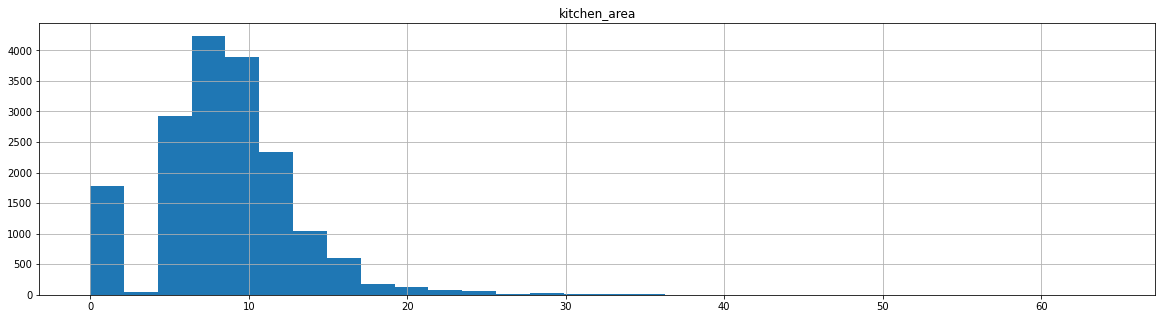

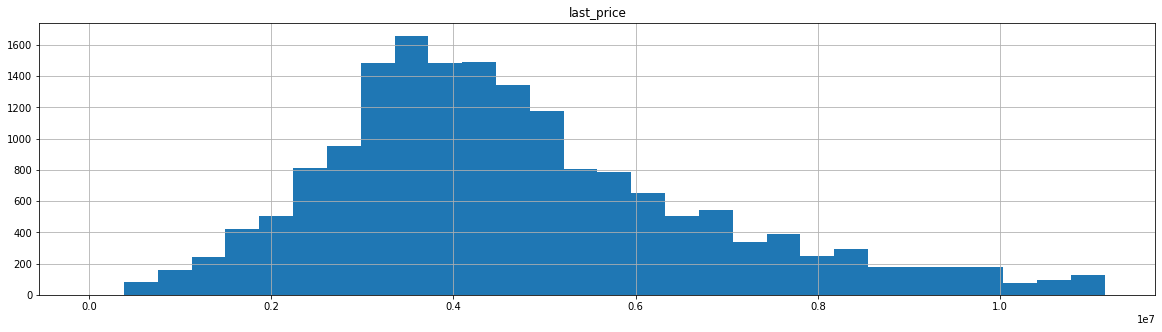

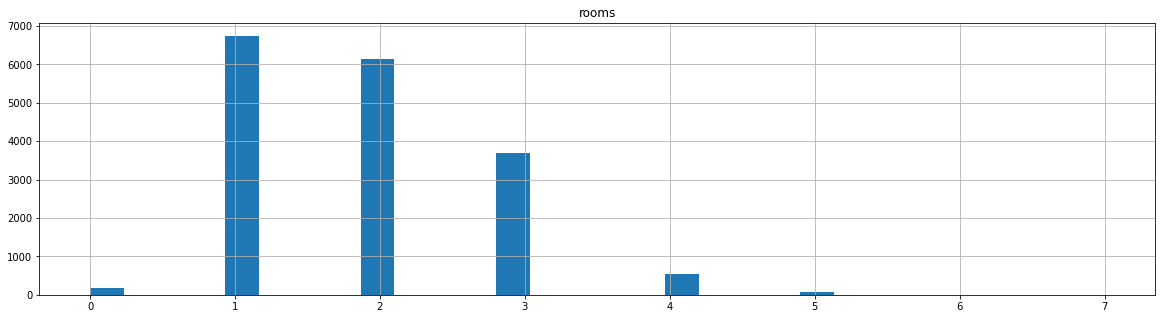

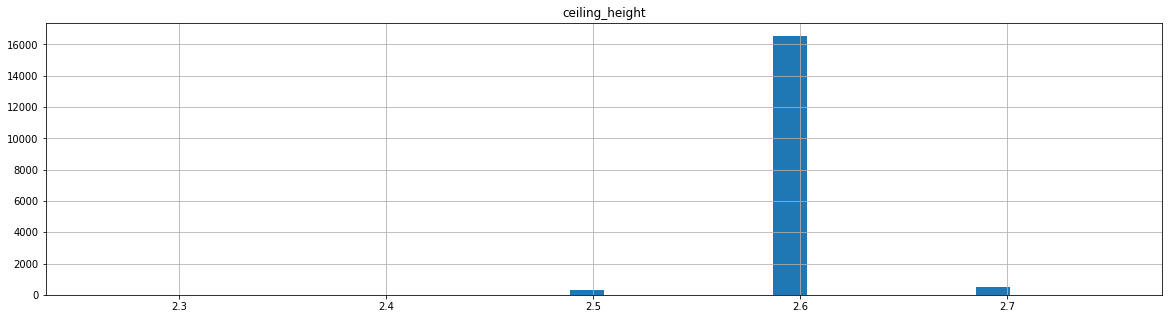

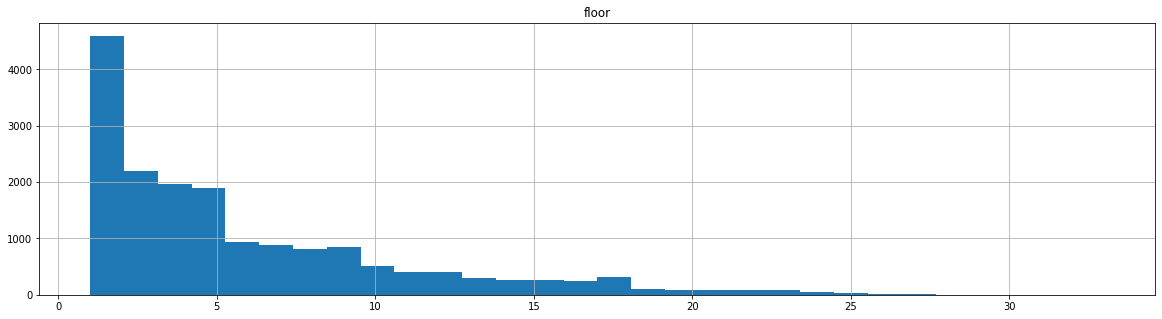

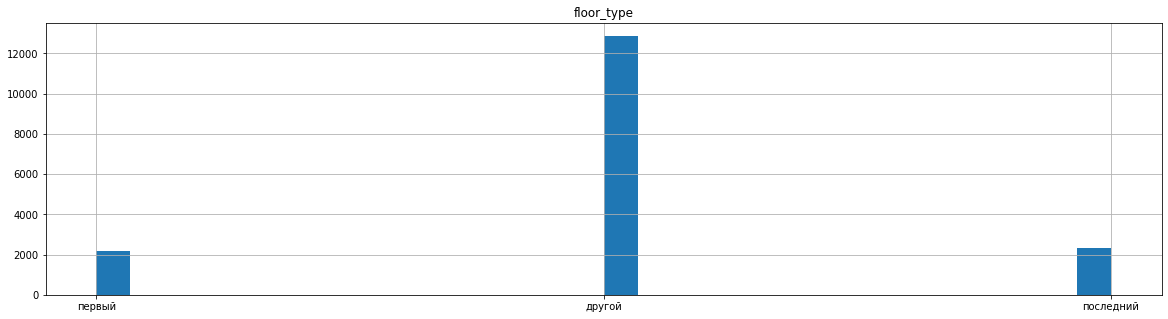

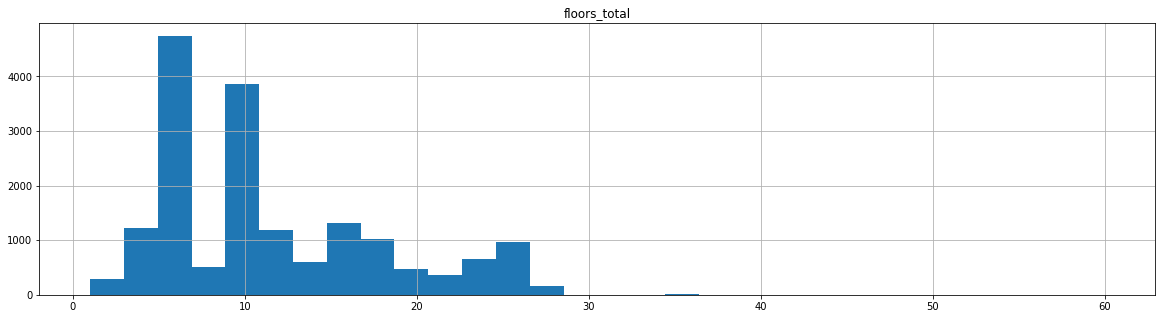

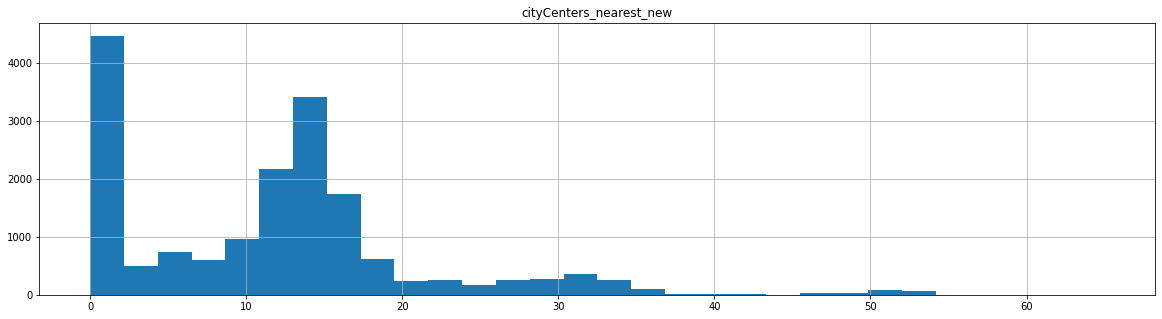

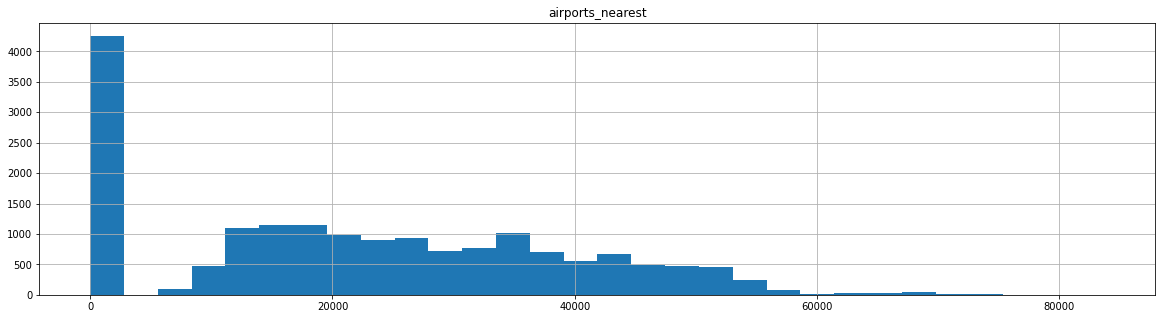

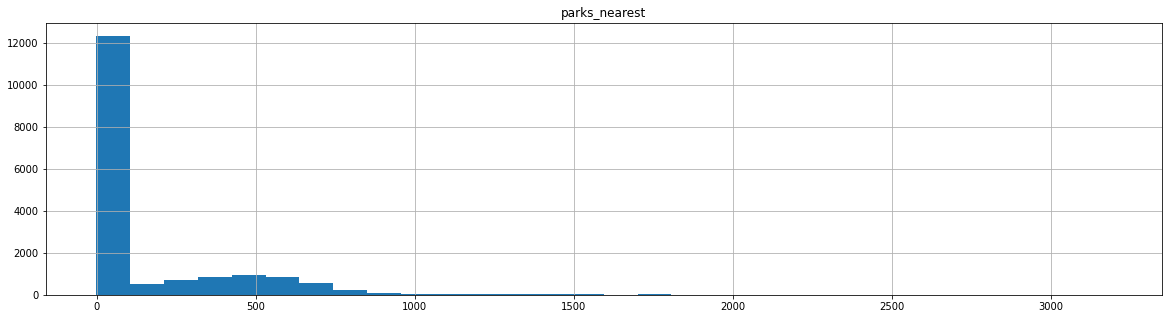

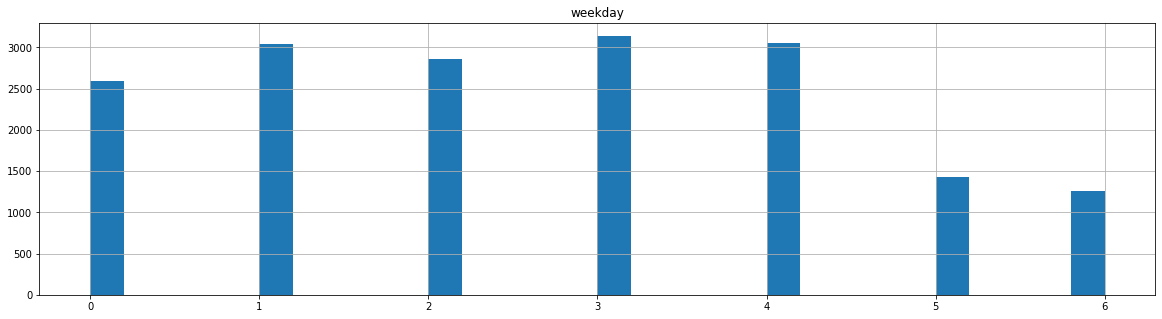

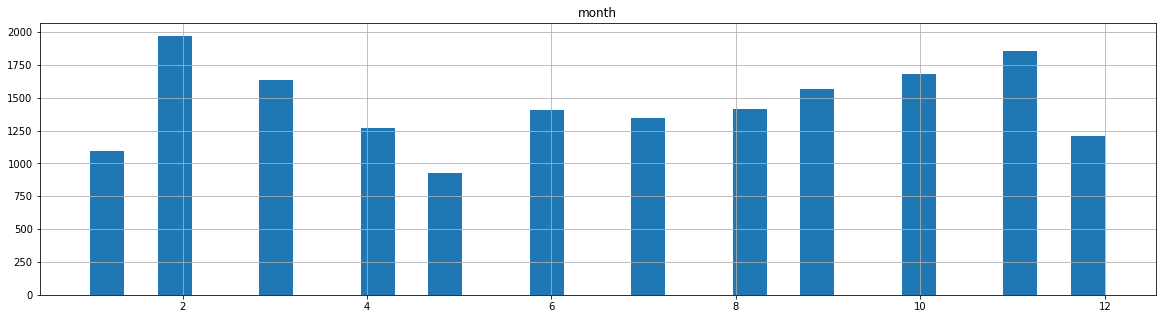

In [59]:
columns_to_analyze = ['total_area',
                      'living_area',
                      'kitchen_area',
                      'last_price',
                      'rooms',
                      'ceiling_height',
                      'floor',
                      'floor_type',
                      'floors_total',
                      'cityCenters_nearest_new',
                      'airports_nearest',
                      'parks_nearest',
                      'weekday',
                      'month']
for column in columns_to_analyze:
    data[column].hist(bins = 30,figsize = (20,5))
    plt.title(column)
    plt.show()

- общая площадь - большинство квартир имеют общую площадь около 40-50 кв.м, распределение сдвинуто влево, маленьких квартир сильно больше

- жилая площадь - преобладают квартиры с жилой площадью 14-18 кв.м, есть пик около 30 кв.м

- площадь кухни - большинство кухонь имеют площадь 5-10 кв.м, большая доля кухонь без площади, эти кухни находятся в студиях, меньшинство - кухни больше 20 кв.м

- цена объекта - распределение похоже на нормальное, наиболее частая цена - около 3500000р

- количество комнат - лидеры - 1 и 2 комнатные квартиры

- высота потолков - высота потолков 2.6м настолько распространена, что на ее фоне почти не видно других значений

- этаж квартиры - максимум значений - первый и второй этаж, далее идет спуск "по ступенькам"

- тип этажа квартиры («первый», «последний», «другой») - первый и последний этажи встречаются в 6 раз реже, чем остальные

- общее количество этажей в доме - лидеры - 5-7 и 9-11, остальные в меньшинстве

- расстояние до центра города в метрах - виден пик в нуле, для этих квартир в данных отсутствовало расстояние, в остальном, похоже на нормальное распределение сильно сдвинутое влево, квартиры на окраине города продают реже, но и в самом центре продают не так часто

- расстояние до ближайшего аэропорта - виден пик в нуле, для этих квартир в данных отсутствовало расстояние, кривая распределения остальных данных очень притупленная, значения более-менее одинаково распространены

- расстояние до ближайшего парка - больше всего квартир с парками в пределах 400-600 метров, также пик, где значений нет

- день и месяц публикации объявления - в два раза чаще публикуют объявления в рабочие дни, также, в середине зимы и середине весны больше всего объявлений, немного меньше - в июне, меньше всего в июле()

## Изучим, как быстро продавались квартиры

In [60]:
data['days_exposition'].median()

80.0

In [61]:
data['days_exposition'].mean()

125.42186150923847

по среднему объявление закрывается за 125 дней, по медианному за 80, это связано с присутсвием объявлений, которые висели больше года

взглянем на гистограмму

<AxesSubplot:>

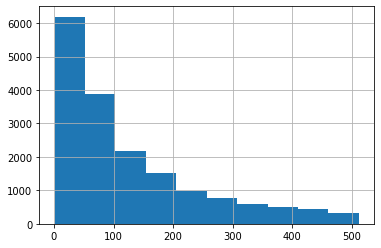

In [62]:
data['days_exposition'].hist()

<AxesSubplot:>

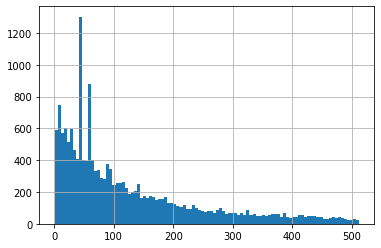

In [63]:
data['days_exposition'].hist(bins=100)

При более детальном рассмотрении видны пики, посмотрим еще ближе

<AxesSubplot:>

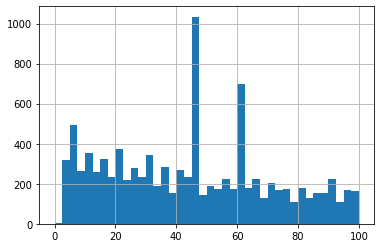

In [64]:
data['days_exposition'].hist(bins=40, range=(0,100))

Пики приблизительно по 45 и 60 дней

In [65]:
data['days_exposition'].value_counts().sort_values(ascending=False)

45     876
60     533
7      225
30     196
4      164
      ... 
495      3
471      3
512      2
1        1
501      1
Name: days_exposition, Length: 512, dtype: int64

Зоркий глаз, действително, по 45 и 60 дню очень много значений, это может быть вызвано сбоем, такая грандиозная разница

Посмотрим график до этих пиков

<AxesSubplot:>

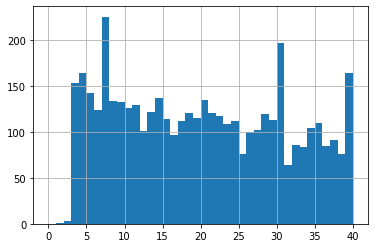

In [66]:
data['days_exposition'].hist(bins=40, range=(0,40))

============OLD==============

большинство объявлений закрывались за 0-50 дней, виден резкий спад

быстрая продажа - 0-50 дней

медленная продажа - больше 100 дней

большинство объявлений закрывались за неделю, чуть реже - за месяц, далее статистика падает

быстрая продажа - 7-30 дней

медленная продажа - 100 дней и более

## изучим какие факторы больше всего влияют на общую (полную) стоимость объекта

взглянем на таблицу корреляции

In [67]:
analyze = ['last_price',
           'total_area',
           'living_area',
           'kitchen_area',
           'rooms',
           'floor_type_numeric',
           'weekday',
           'month',
           'year']
data[analyze].corr()['last_price']

last_price            1.000000
total_area            0.691094
living_area           0.551338
kitchen_area          0.400618
rooms                 0.451284
floor_type_numeric    0.152799
weekday              -0.006170
month                 0.007290
year                  0.001631
Name: last_price, dtype: float64

уже из таблицы корреляции видно, что больше всего влияет общая площадь, от количества комнат цена зависит меньше, даты вовсе, почти не влияют, при подсчете рыночной стоимости стоит обратить наибольшее внимание на общую площадь объекта.

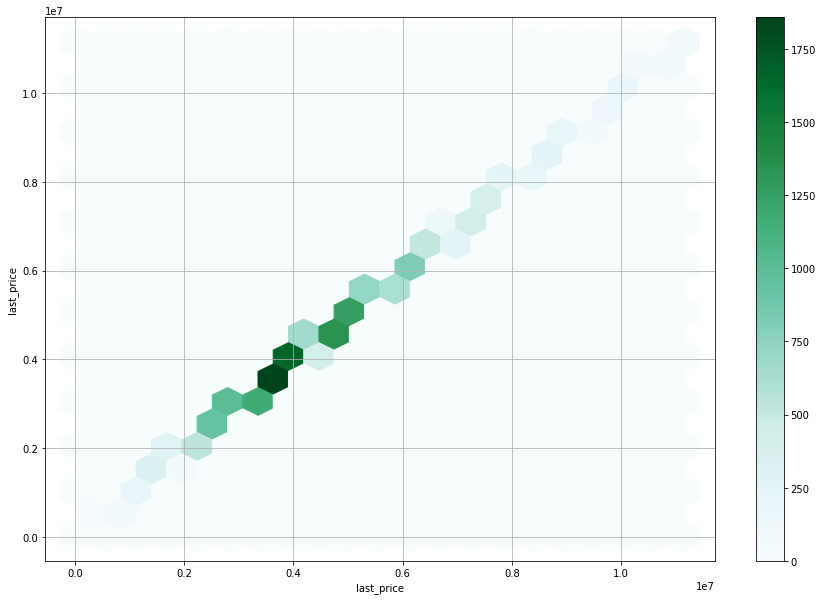

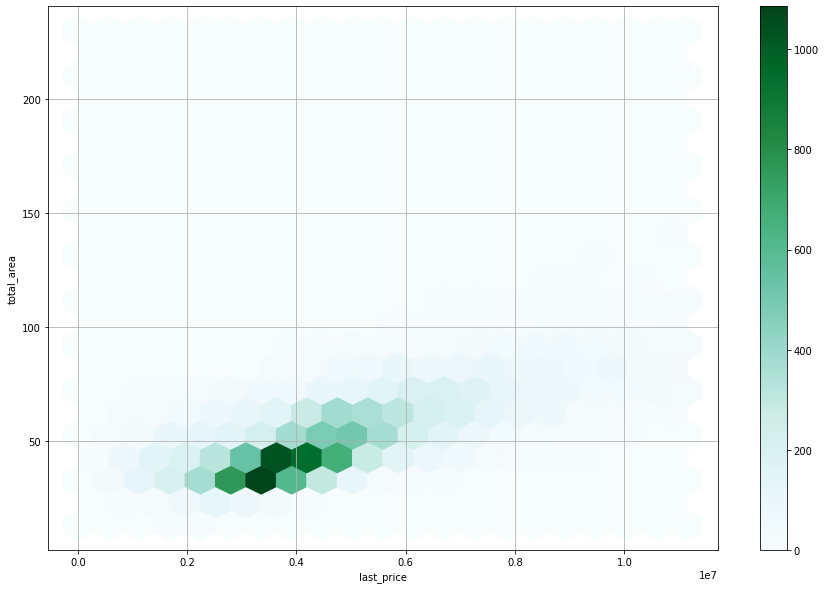

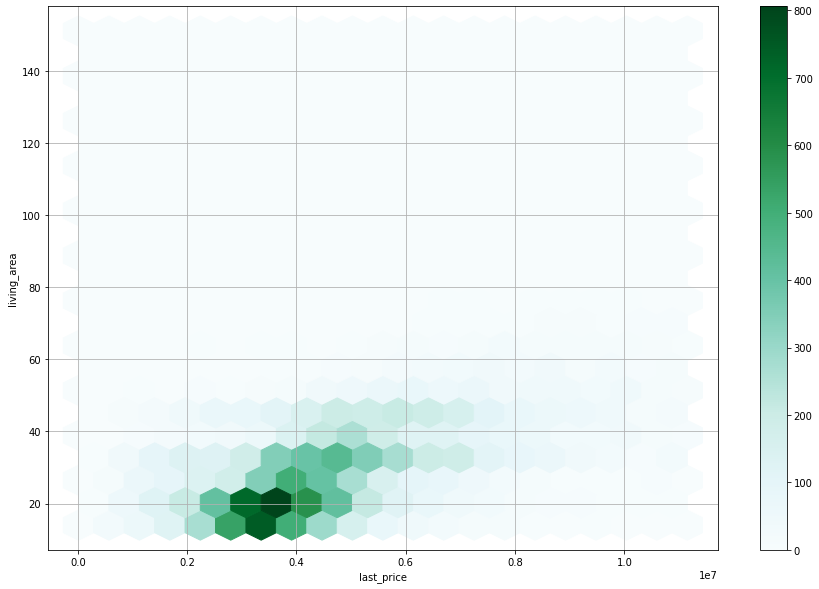

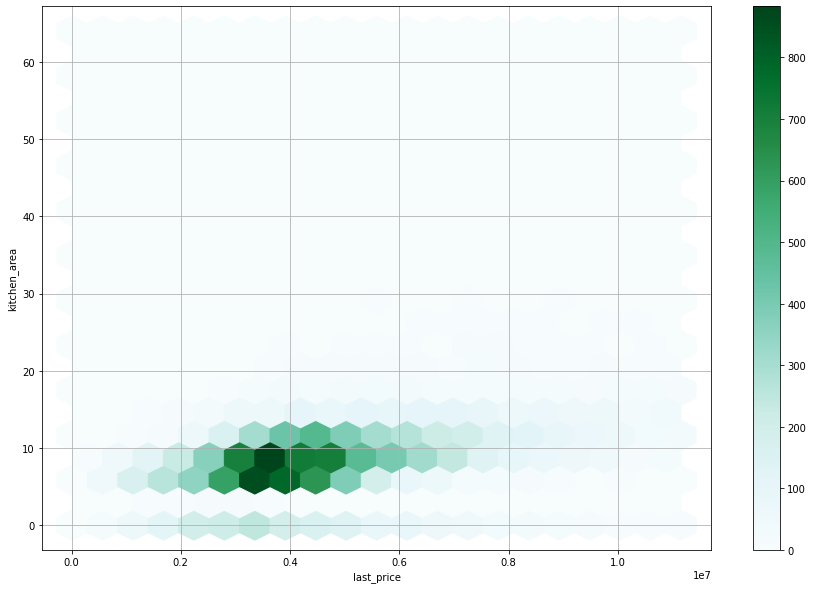

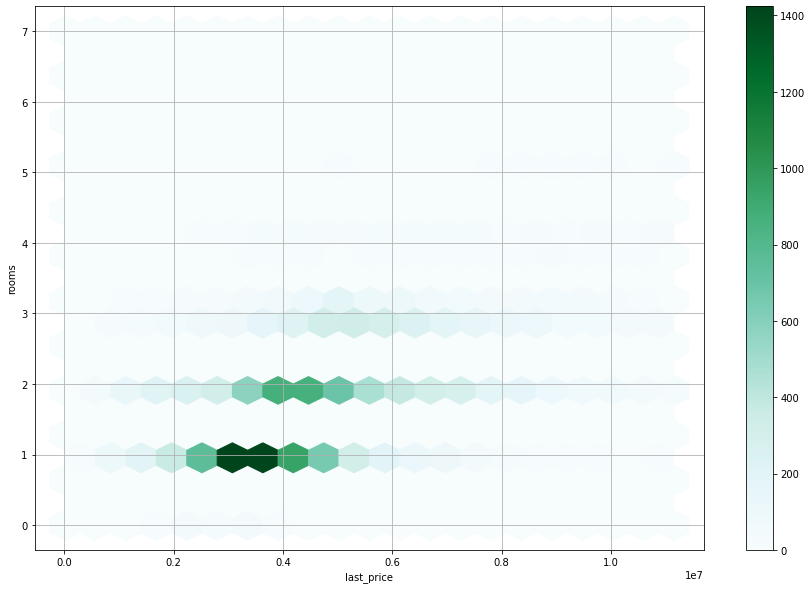

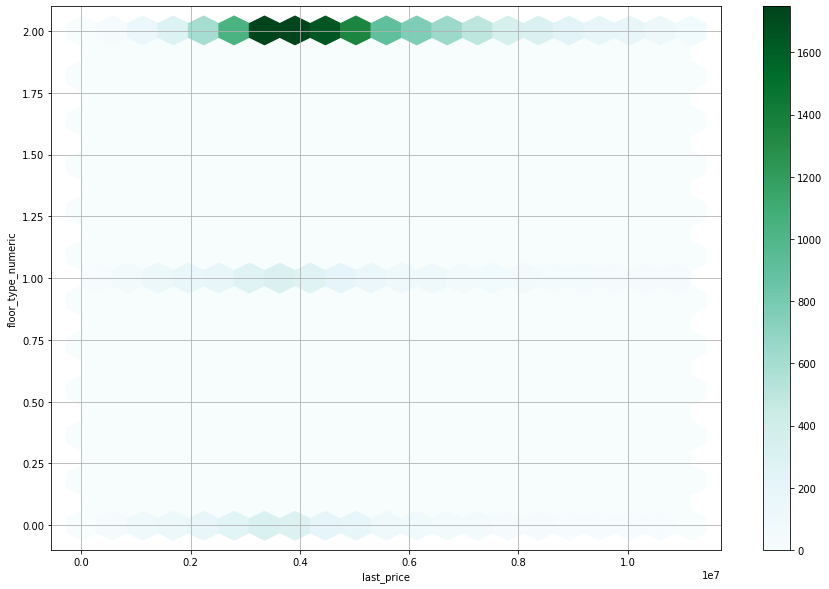

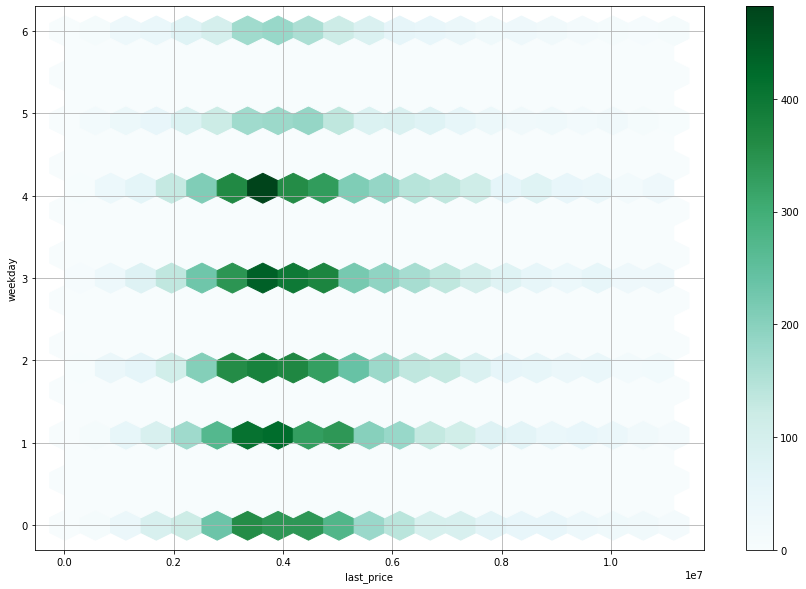

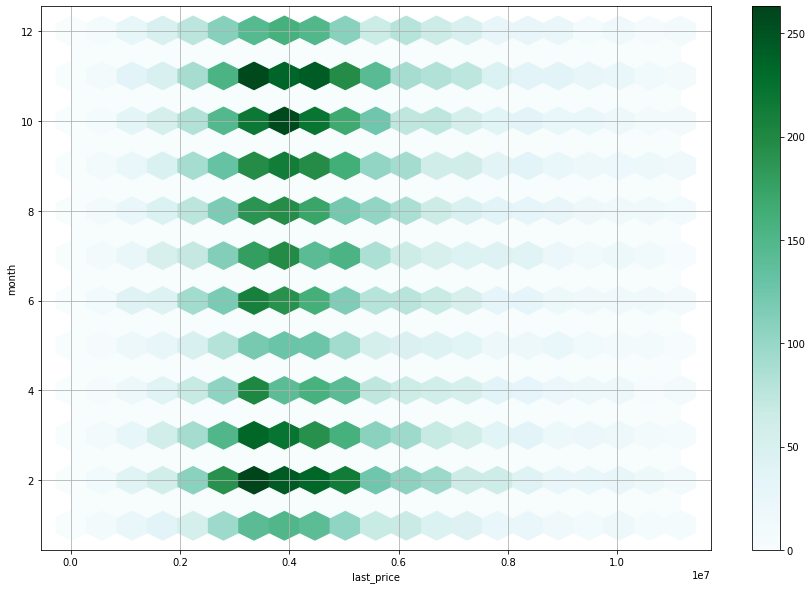

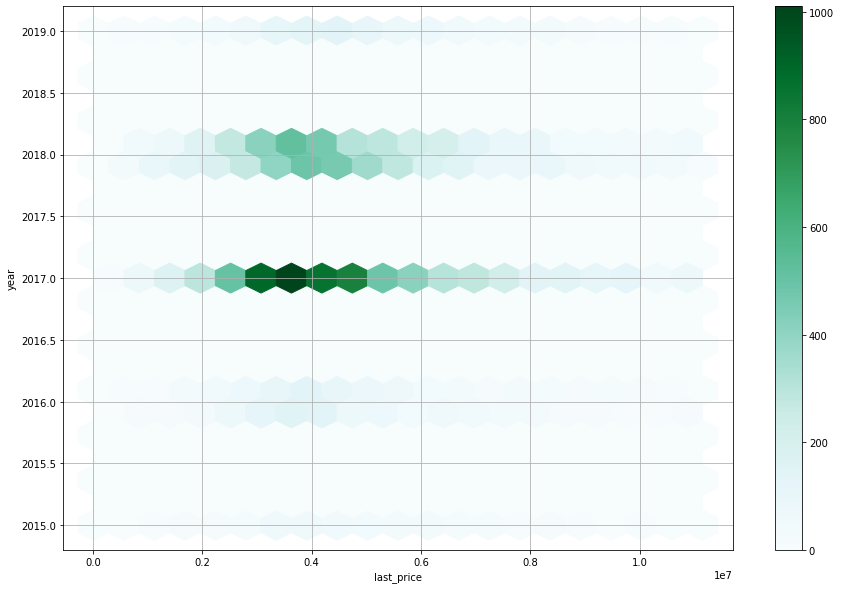

In [68]:
for a in analyze:
    data.plot(x='last_price', y=a, kind='hexbin', gridsize=20, sharex=False, grid=True, figsize=(15,10))

- общая площадь - видна прямая зависимость, больше площадь - больше цена
- жилая площадь - видна прямая зависимость, больше площадь - больше цена
- площадь кухни - видна прямая зависимость, но не такая сильная, как у других площадей
- количество комнат - прямая зависимость, в среднем, каждая комната прибавляет 25% к цене
- типа этажа, на котором расположена квартира - если хорошо присмотреться, видно что на первом этаже квартиры дешевле, чем на последнем, а на других этажах картина похожая
- день недели - зависимость не видно
- месяц - зависимость не видно
- год - зависимость не видно
 

## Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [69]:
top10_avg_ppm = (data.pivot_table(index = 'locality_name',
                                  values = ['price_per_meter'],
                                  aggfunc = ['count','median'])) #добавил di )))))))
top10_avg_ppm.columns = ["count","median"]
top10_avg_ppm.sort_values(by = "count",inplace = True,ascending = False)
top10_avg_ppm.head(10)

,count,median
locality_name,,
санкт-петербург,11073,100700.525394
поселок мурино,515,86042.638623
поселок шушары,387,75917.739766
всеволожск,307,65536.723164
колпино,292,73454.125678
поселок парголово,288,90373.328248
деревня кудрово,267,91666.666667
пушкин,259,97297.297297
гатчина,243,67073.170732


Самая высокая средняя цена, ожидаемо, Санкт-Петербург

самая низкая - Выборг

## выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра

,last_price
cityCenters_nearest_new,
0,7.622500e+06
1,7.820119e+06
2,7.627787e+06
3,6.832101e+06
4,7.169248e+06
5,7.251391e+06
6,6.807096e+06
7,6.364607e+06
8,6.285772e+06


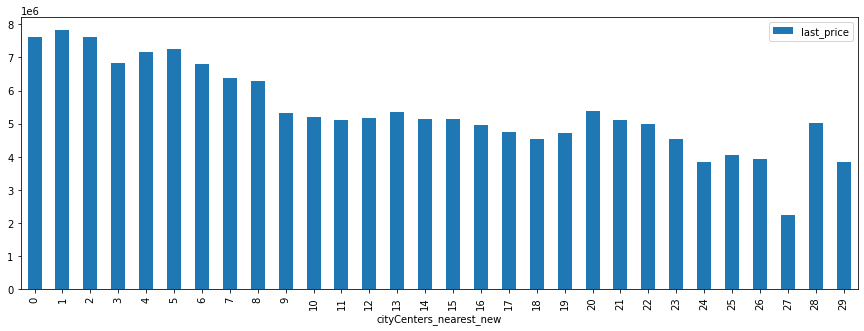

In [70]:
spb = data.query('locality_name == "санкт-петербург"')
spb_pt = spb.pivot_table(index='cityCenters_nearest_new',values='last_price')
spb_pt.plot(y = 'last_price', kind = 'bar',figsize = (15,5))
spb_pt

- на 8-9км виден резкий спад стоимости, что похоже, является границей центра города
- на 28км виден пик, подозреваю, что это Красносельский район или Павловск
- на 19-23км видим всплеск, не могу узнать, что его вызвало
- в целом виден тренд, ближе к центру - дороже
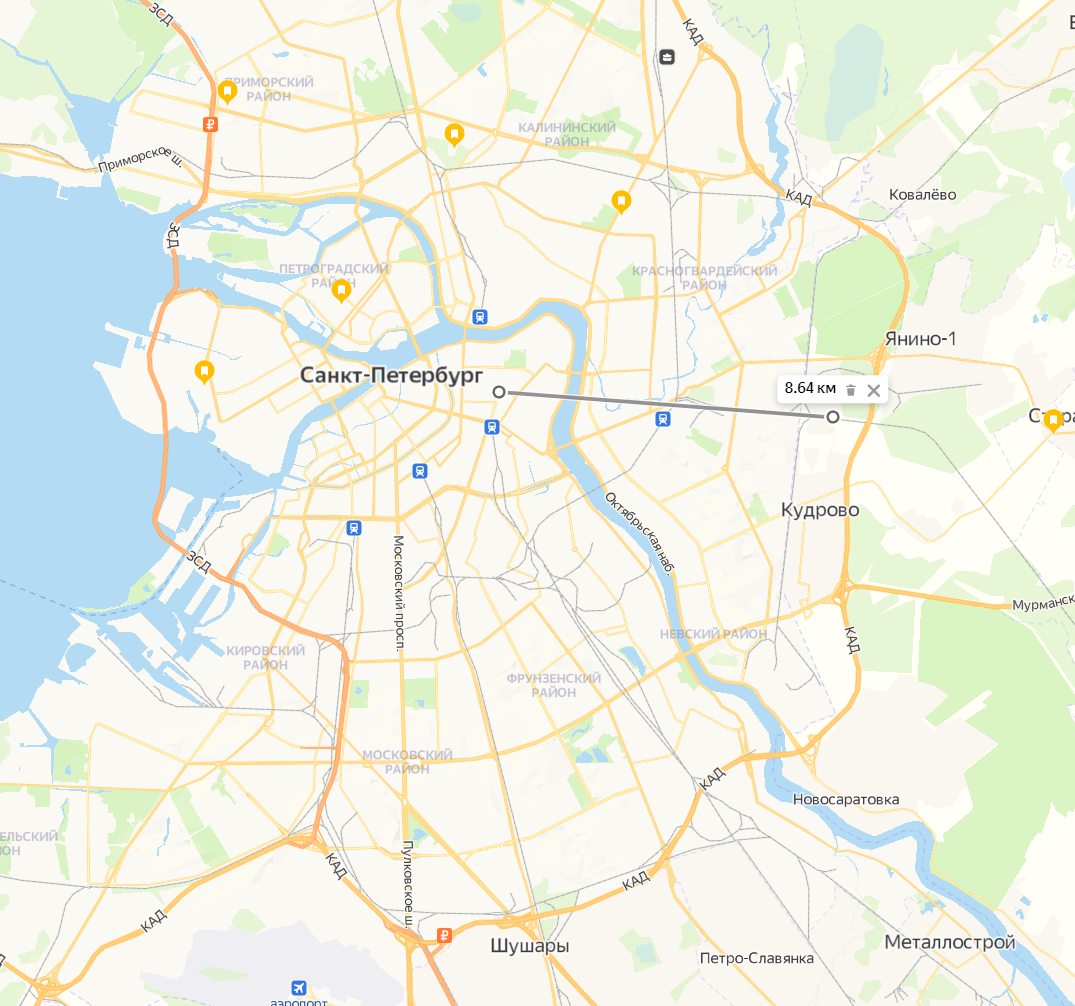

In [71]:
spb.corr()['last_price'].sort_values()

cityCenters_nearest_new   -0.342287
cityCenters_nearest       -0.342097
open_plan                 -0.054599
airports_nearest          -0.006603
month                      0.000542
is_apartment               0.001636
ceiling_height             0.007375
weekday                    0.007509
year                       0.019621
ponds_nearest              0.041726
floor                      0.063680
parks_nearest              0.078907
balcony                    0.079522
floors_total               0.091575
days_exposition            0.093377
floor_type_numeric         0.094950
parks_around3000           0.111808
total_images               0.137098
ponds_around3000           0.161065
price_per_meter            0.366191
kitchen_area               0.432412
rooms                      0.517139
living_area                0.638531
total_area                 0.787630
last_price                 1.000000
studio                          NaN
month101                        NaN
Name: last_price, dtype: flo

**Напоследок посчитаем корреляции по СПБ**

**Вывод**

Выявлены следующие зависимости:
- стоимость сильно зависит от общей площади
- стоимость сильно зависит от жилой площади
- стоимость зависит от расстояния до центра города для больших городов
- стоимость зависит от площади кухни
- в среднем, каждая новая комната добавляет по 25% к стоимости

**От чего больше всего зависит цена:**  (в порядке убывания)
- общая площадь
- жилая площадь
- количество комнат
- площадь кухни

# Общий вывод

**Ход исследования**
 1. Считывание данных, ознакомление с информацией о данных.
 2. Предобработка данных.
 3. Расчет новых столцов.
 4. Исследовательский анализ данных.
 
Предобработка данных была довольно большой, в данных было очень много пропусков, со всеми из них удалось разобраться

В данных были выявлены зависимости и наиболее распространенные значения

**основные ключевые моменты:**
- цена объекта - распределение похоже на нормальное, наиболее частая цена - около 3500000р
- количество комнат - лидеры - 1 и 2 комнатные квартиры
- большинство объявлений закрывались за неделю, чуть реже - за месяц
- быстрая продажа - 7-30 дней
- медленная продажа - 100 дней и более
- в среднем, каждая новая комната добавляет по 25% к стоимости

**От чего больше всего зависит цена:**  (в порядке убывания)
- общая площадь
- жилая площадь
- количество комнат
- площадь кухни
- расстояние до центра города (для больших городов)

**Рекомендации:**
- при подсчете рыночной стоимости стоит обратить наибольшее внимание на площади, количество комнат и на расстояние до центра города (для больших городов)
- улучшить алгоритмы расчета географических параметров, у многих объявлений их нет, 
- при публикации объявления следует настойчивее спрашивать пользователя о том, объект - студия, или нет, это упростит и ускорит дальнейший анализ
